# Regression polynomiale avec Numpy :
_https://machinelearnia.com/regression-lineaire-python/_


In [21]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## 1. DataSet :

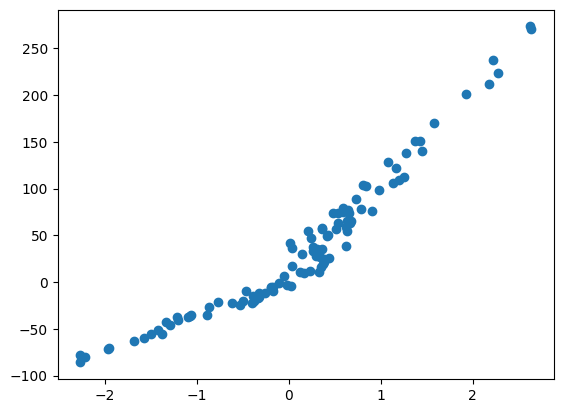

In [22]:
x,y = make_regression(n_samples = 100 , n_features = 1 , noise = 10)
y = y + abs(y/2) #pour briser l'aspet linéaire de l'echantillon de données
plt.scatter(x, y)

On vérifie les dimensions de nos matrices générées :

In [23]:
print(x.shape) #return a tupe (ligne,column)
print(y.shape)
y = y.reshape(y.shape[0], 1) # il est vivement conseillé de redéfinir les dimensions de la matrice y
print(y.shape)

(100, 1)
(100,)
(100, 1)


**On construit une matrice 'X' qui sera la matrice 'x' avec la colonne de biais:**(on utilise l'horizontal stack de numpy pour coller les 2 matrices (respet de l'ordre d'insersion des matrices important) :

In [42]:
X = np.hstack((x,np.ones(x.shape)))
X = np.hstack((x**2, X))
print(X.shape)
print(X[:10])

(100, 3)
[[ 3.54847137e-01  5.95690471e-01  1.00000000e+00]
 [ 1.82807338e-03  4.27559748e-02  1.00000000e+00]
 [ 1.45772372e+00 -1.20736230e+00  1.00000000e+00]
 [ 3.85096483e+00 -1.96238753e+00  1.00000000e+00]
 [ 1.55457809e-01 -3.94281383e-01  1.00000000e+00]
 [ 6.93113540e-02  2.63270496e-01  1.00000000e+00]
 [ 2.89137285e-01  5.37714874e-01  1.00000000e+00]
 [ 3.83328738e-01  6.19135477e-01  1.00000000e+00]
 [ 1.89787760e+00  1.37763478e+00  1.00000000e+00]
 [ 4.27325513e-04 -2.06718532e-02  1.00000000e+00]]


**On définit le vecteur qui caractérise notre modèle polynomial y = ax²+bx+c :**


In [25]:
theta = np.random.randn(3,1) #on initialise le vecteur Theta par des valuers aléatoires :
theta

array([[1.18471853],
       [1.46888475],
       [0.06946722]])

## 2. Contruction du modèle linéaire : F=X.θ

In [26]:
def model (X, theta):
    return X.dot(theta)

In [27]:
model(X,theta)[:10] # on teste la fonction model pour voir si on n'a pas fait d'erreur

array([[ 1.36486186],
       [ 0.13443658],
       [ 0.02298346],
       [ 1.74925551],
       [-0.32551294],
       [ 0.53829569],
       [ 1.2018547 ],
       [ 1.43304255],
       [ 4.34150472],
       [ 0.03960892]])

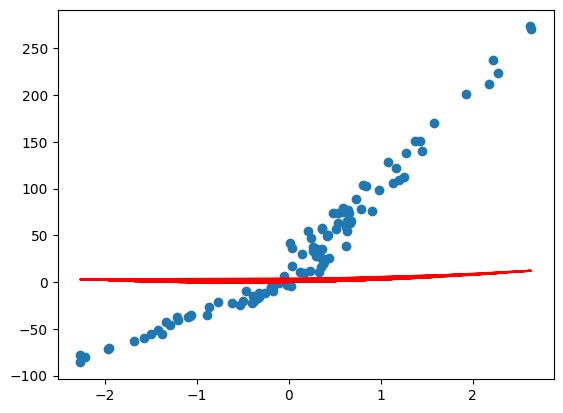

In [28]:
plt.plot(x , model(X,theta), color = 'r')
plt.scatter(x,y)

==> la pente dépend du paramètre **a** choisi aléatoirement en haut.

## 3. La fonction Coût : (l'erreur quadratique moyenne)

In [29]:
def cost_function (X, y, theta) :
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y) **2)
    
    

In [30]:
cost_function(X,y,theta)

3414.8237194012468

## 4. Gradients et Descente de gradients :

In [31]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) - y)
    

In [32]:
def gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000):  #parametres par defaut  0.01 et 1000

    cost_history = np.zeros(n_iterations)#  pour la courbe d'apprentissage
    for i in range (0,n_iterations) :
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X,y,theta)
        
    return theta, cost_history , n_iterations
    

## 5. Machine Leaning :


In [33]:
theta_final, cost_history,n_iterations = gradient_descent(X,y,theta,learning_rate=0.01,n_iterations=1000) #passage d'arguments

In [34]:
print(theta_final)

[[12.60968458]
 [68.66897934]
 [14.82560952]]


In [35]:
predictions = model(X,theta_final)

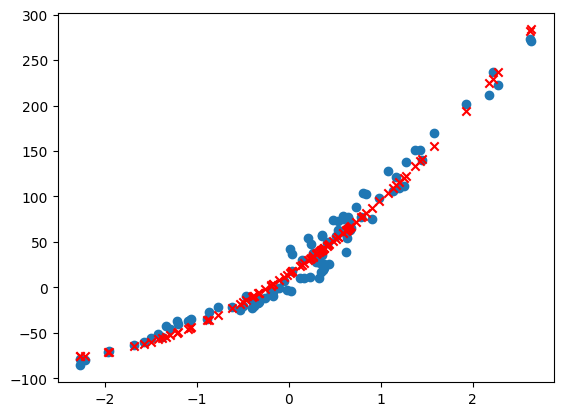

In [43]:
#Comparaison du modèle avec le dataset :

plt.scatter(x,y)
plt.scatter(x,predictions,color='r',marker='x')

In [37]:
print(f"le modèle final est y = {str(theta_final[0])}* x² + {str(theta_final[1])}* x + {theta_final[2]}")

le modèle final est y = [12.60968458]* x² + [68.66897934]* x + [14.82560952]


## 5.1 Courbe d'apprentissage :


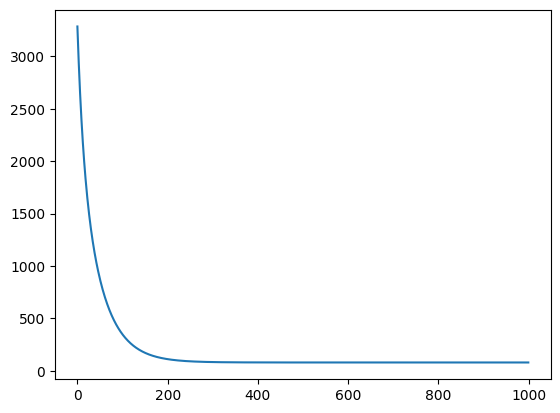

In [38]:
plt.plot(np.arange(n_iterations), cost_history) #il faut que les 2 variable aient la mme dimension

## 5.2 Coefficient de determination :

![Alt text](image.png)

En bref :

![Alt text](image-1.png)

In [39]:
def coef_determination (y, predictions):
    u = ((y - predictions)**2).sum()
    v = ((y - y.mean())**2).sum()
    return f"{round((1 - u/v)*100),2}%"

In [40]:
coef_determination (y, predictions)

'(97, 2)%'